In [1]:
#  For sting e changes I made in python files

In [2]:
from config import config
from tqdm import tqdm
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from detectors import Detector
import numpy as np
import matplotlib.pyplot as plt
from limit_calc import Limits
from bkgrd_calc import Background
from signal_calc import Signal
from pdm import PDM
import pickle
from scipy.interpolate import UnivariateSpline
from constants import pdm_constants

In [27]:
# Parameters ---
config["general"]["detector"] = "IceCube"
config["general"]["year"] = 9
mass_grid = np.logspace(1, 4, 20) # np.logspace(1, 6, 10)
sv_grid = np.logspace(-24, -21, 20) # 10
angle = config['atmospheric showers']['theta angles']
b = Atm_Shower()
mass_id = -1
sv_id = -1

In [42]:
aeff = Aeff()
dete = Detector(aeff)

Loading Effective Area


In [57]:
dm = DM2Nu()
sig = Signal(aeff, dm, dete)

In [61]:
signal_count = sig.signal_calc( b.egrid, 1e4, 1e-24)

/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:344: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)
/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:345: RuntimeWarning: overflow encountered in multiply
  return A * aa * dd
100%|██████████| 91/91 [05:37<00:00,  3.71s/it]


In [ ]:
aeff.effective_area_func()

In [51]:
e, sm = dete.smearing_function(4,20,9)

In [52]:
np.trapz(sm, e)

0.9999999999999999

In [53]:
sp_sm = UnivariateSpline(e, sm, k=1,s=0,ext=1)(np.log10(b.egrid))

In [56]:
np.trapz(sp_sm, np.log10(b.egrid))

0.9995841861455633

In [6]:
#p = PDM()

In [40]:
# Flux, Counts, effective area loading that need chaning depending on the day ....
ice_flux = {}
for m in mass_grid:
    for sv in sv_grid:
        ice_flux[m,sv] = pickle.load(open("/home/kruteesh/Desktop/dm_data_server/24_11/data/signal_flux/extra_%.1e_%.1e.pkl"%(m,sv),"rb"))
signal_m = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/24_11/data/limits_signal_IceCube.pkl','rb'))
background_po = pickle.load(open('/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/data/background_pone.pkl','rb'))
eff_area = pickle.load(open('/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/data/eff_area_ice.pkl','rb')) 
background_ic = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/26_11/data/background_ice.pkl','rb'))
back = pickle.load(open('/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/data/background_ice.pkl','rb'))
limits = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/24_11/data/limits_results_IceCube.pkl','rb'))

In [29]:
# Limits data Loading 

cl_lit = np.loadtxt('/home/kruteesh/Desktop/DM_nu_simulation_P-One/Literature/limits_Ice.csv', delimiter=",")
cl_lit = (cl_lit[cl_lit[:, 0].argsort()])
m_1e4 = np.loadtxt("../data/m_1e4.csv",delimiter=",")
m_1e4 = (m_1e4[m_1e4[:, 0].argsort()])
m_1e2 = np.loadtxt("../data/m_1e2.csv",delimiter=",")
m_1e2 = (m_1e2[m_1e2[:, 0].argsort()])
m_1e6 = np.loadtxt("../data/m_1e6.csv",delimiter=",")
m_1e6 = (m_1e6[m_1e6[:, 0].argsort()])

<ipython-input-30-b79b805c8085>:7: UserWarning: No contour levels were found within the data range.
  plt.contour(limits, levels=[0.9], colors='purple',


Text(0.5, 0, '$m_{x}$ [GeV]')

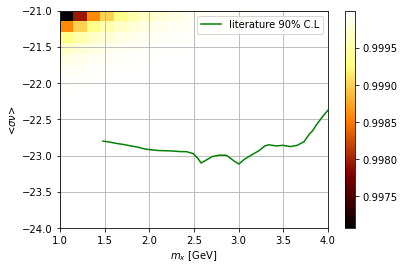

In [30]:
# Limits Comparision ----
plt.imshow( limits, extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                              min(np.log10(sv_grid)), max(np.log10(sv_grid))),
                     origin='lower', aspect='auto',cmap=plt.cm.afmhot)

plt.colorbar()
plt.contour(limits, levels=[0.9], colors='purple',
                origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                        min(np.log10(sv_grid)), max(np.log10(sv_grid))))  #  origin!!!!!!!!!!
plt.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature 90% C.L')

plt.legend()
plt.grid()
plt.ylabel(r'<$\sigma \nu$>')
plt.xlabel(r'$m_{x}$ [GeV]')

Text(0, 0.5, 'Effective Area [$cm^2$]')

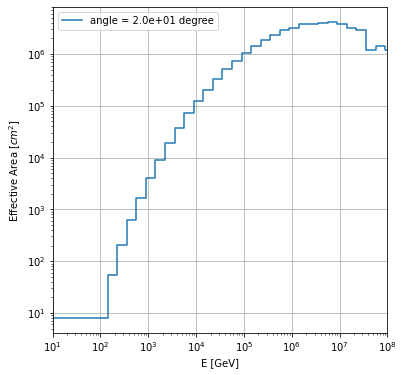

In [31]:
# Effective area comparision ----
plt.figure(figsize=(6,6))
plt.step(b.egrid,eff_area[angle[20]],label=r'angle = %.1e degree' %angle[20])
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e8)
#plt.ylim(1,1e7)
plt.legend()
plt.grid()
plt.xlabel('E [GeV]')
plt.ylabel(r'Effective Area [$cm^2$]')

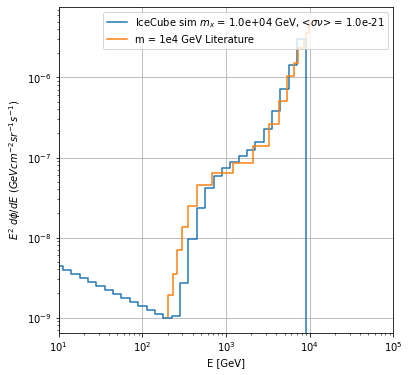

In [32]:
flux = ice_flux[1e04, 1e-24]
plt.figure(figsize=(6,6))
plt.step(b.egrid,(flux*b.egrid**2),label=r'IceCube sim $m_{x}$ = %.1e GeV, <$\sigma\nu$> = %.1e' %(mass_grid[mass_id], sv_grid[sv_id]))
plt.step(m_1e4[:, 0], m_1e4[:, 1],"-",label="m = 1e4 GeV Literature")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e5)
#plt.ylim(1e1,1e7)
plt.legend()
plt.xlabel('E [GeV]')
plt.ylabel(r'$E^2$ $d\phi/dE$ $(GeV cm^{-2} sr^{-1} s^{-1})$')
plt.grid()

In [33]:

# summing effective areas over all thetas [0,90]
total_eff=np.zeros_like(eff_area[0])
for theta in angle:
    total_eff=total_eff+eff_area[theta]
# Simulated Flux  
flux = ice_flux[mass_grid[mass_id], sv_grid[sv_id]]

Text(0, 0.5, '# counts')

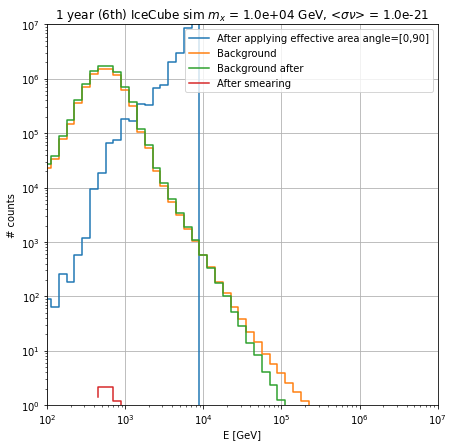

In [41]:
# Counts comparision ---------
plt.figure(figsize=(7,7))
plt.title(r'1 year (6th) IceCube sim $m_{x}$ = %.1e GeV, <$\sigma\nu$> = %.1e' %(mass_grid[mass_id], sv_grid[sv_id]))
plt.step(b.egrid,flux*b.ewidth*total_eff*3600*24*365,label=r"After applying effective area angle=[0,90]")

plt.step(b.egrid,background_ic['numu'],label='Background')
plt.step(b.egrid,back['numu'],label='Background after')
plt.step(b.egrid[-len(signal_m[mass_id][sv_id]):],signal_m[mass_id][sv_id],label="After smearing")
#plt.step(b.egrid[-len(p.signal[mass_id][sv_id]):],p.signal[mass_id][sv_id],label="POne")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e2,1e7)
plt.ylim(1,1e7)
plt.grid()
plt.legend()
plt.xlabel('E [GeV]')
plt.ylabel(r'# counts')

In [35]:
# does this make sense ???? 
eff_counts = np.sum(flux*b.ewidth*total_eff*60*60*24*365) # 
smea_counts = np.sum(signal_m[mass_id][sv_id])

In [36]:
eff_counts/smea_counts

4262051.5664463425

In [37]:
smea_counts

7.317370679762592

In [38]:
eff_counts

31187011.167950694

In [39]:
total_sig = []
total_back = []
for theta in tqdm(np.linspace(0,90,91)):
    check_angle = theta
    tmp_1 = []
    back_c = []
    signal_c = []
    log_egrid = np.log10(b.egrid)
    i = 0
    flux_sig = dm.extra_galactic_flux(b.egrid, 1e4, 1e-24)
    flux_back = aeff.effective_area_func(b.surface_fluxes, 9)[0][theta]
    for j,id_check in enumerate(range(len(log_egrid))):
        smearing_e, smearing = dete.smearing_function(
                                                    log_egrid[
                                                        id_check],
                                                    check_angle,
                                                    9)
        # print(len(at_counts_unsm[theta]), len(smearing))
        if len(smearing) < 3:
            continue
        local_sp = (UnivariateSpline(smearing_e,
                                    (smearing),
                                    k=1, s=0,
                                    ext=1)(np.log10(b.egrid)))
        back_c.append(local_sp*flux_back[id_check]) 
        signal_c.append(local_sp*flux_sig[id_check])
        i=j
        tmp_1.append(1*np.trapz(local_sp,x=np.log10(b.egrid)))

    total_back.append(np.sum(back_c,axis=0))
    total_sig.append(np.sum(signal_c,axis=0))
    tmp_bkgrd = np.sum(tmp_1, axis=0)

total_back = np.sum(total_back, axis=0)
total_sig = np.sum(total_sig, axis=0)


  0%|          | 0/91 [00:00<?, ?it/s]


NameError: name 'dm' is not defined

Text(0, 0.5, '# counts')

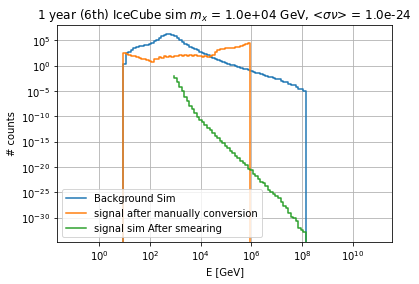

In [ ]:
# Manual calculation of counts after smearing 
plt.title(r'1 year (6th) IceCube sim $m_{x}$ = %.1e GeV, <$\sigma\nu$> = %.1e' %(1e4,1e-24))
#plt.step(b.egrid, total_back,label='Background')
#plt.step(b.egrid, total_sig,label='Signal' )
plt.step(b.egrid,background_ic['numu'],label='Background Sim')
plt.step(b.egrid,flux*b.ewidth*total_eff*3600*24*365,label=r'signal after manually conversion')
plt.step(b.egrid[-len(signal_m[mass_id][sv_id]):],signal_m[mass_id][sv_id],label="signal sim After smearing")
plt.xscale('log')
plt.yscale('log')
#plt.xlim(1e2,1e5)
#plt.ylim(1,1e6)
plt.grid()
plt.legend()
plt.xlabel('E [GeV]')
plt.ylabel(r'# counts')

In [ ]:
plt.loglog(b.egrid,local_sp)

NameError: name 'local_sp' is not defined

In [ ]:
np.sum(tmp_bkgrd)/i

1.0062219840212483